In [0]:
# Import necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [0]:
path = "/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/InsideAirbnb/data/"
calendar = pd.read_csv(path+"calendar.csv")
listings = pd.read_csv(path+"listings.csv")
reviews = pd.read_csv(path+"reviews.csv")
listings_summary = pd.read_csv(path+"listings_summary.csv")
reviews_summary = pd.read_csv(path+"reviews_summary.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,44077,2019-11-26,t,$45.00,$45.00,3,60
1,928970,2019-11-26,t,$130.00,$130.00,2,28
2,928970,2019-11-27,t,$130.00,$130.00,2,28
3,928970,2019-11-28,t,$150.00,$150.00,2,28
4,928970,2019-11-29,t,$150.00,$150.00,2,28


In [0]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20200321154917,2020-03-21,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,...,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,a week ago,t,7,11,23,275,2020-03-21,227,38,2011-03-20,2020-03-06,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.07


In [0]:
for i in listings.columns:
  print(i) 
# review_scores_accuracy
# review_scores_cleanliness
# review_scores_checkin
# review_scores_communication
# review_scores_location
# review_scores_value

In [0]:
reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...


In [0]:
listings_summary.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,219,2019-11-25,2.07,3,240


In [0]:
reviews_summary.head(5)

,listing_id,date
0,44077,2011-03-20
1,44077,2011-03-28
2,44077,2011-04-21
3,44077,2011-05-13
4,44077,2011-05-17


In [0]:
df = pd.merge(reviews, listings[['neighbourhood_group_cleansed', 'host_id', 'latitude',
                          'longitude', 'number_of_reviews', 'id', 'property_type','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
                          ,'review_scores_communication','review_scores_location','review_scores_value']], 
              left_on='listing_id', right_on='id', how='left')

In [0]:
df.rename(columns = {'id_x':'id', 'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)

In [0]:
#@title explain
#@markdown because score >8.0 has too many samples, so I need to random get 5000 samples from each of them 

df.review_scores_value.value_counts()

9.0     171290
10.0    114307
8.0      19127
7.0        646
6.0        121
5.0         20
4.0         15
2.0         13
Name: review_scores_value, dtype: int64

In [0]:
df_scores={}

for i in score_list:
  df_select = df[df.review_scores_value==i]
  df_scores[i]=df_select
df_scores['<5.0'] = df[df.review_scores_value<=5.0]

# language detection

In [0]:
!pip install langdetect
from langdetect import detect

In [0]:
def language_detection(text):
  try:
    return detect(text)
  except:
    print(text)
    return None

# word cloud

In [0]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

import re
import string

In [0]:
def plot_wordcloud(wordcloud, language, score):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title('Score:'+str(score)+" "+language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

In [0]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

In [0]:
score_list = [6.0,7.0,8.0,9.0,10.0]
word_cloud_dict = {}
for i in score_list:
  df_select = df_scores[i]
  if(df_select.shape[0]>=5000):
    df_select = df_select.sample(5000)
  df_select['language'] = df_select['comments'].apply(language_detection) #spend a lot of time
  df_en = df_select[df_select['language']=='en']
  wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                    width=3000, height=2000,
                    stopwords=stopwords.words('english')).generate(str(df_en.comments.values))
  word_cloud_dict[i] = wordcloud

In [0]:
df_select = df_scores['<5.0']
df_select['language'] = df_select['comments'].apply(language_detection)
df_en = df_select[df_select['language']=='en']
word_cloud_dict['<5'] = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                    width=3000, height=2000,
                    stopwords=stopwords.words('english')).generate(str(df_en.comments.values))

cannot work
-


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
word_cloud_dict

{10.0: <wordcloud.wordcloud.WordCloud at 0x7f584acbb518>,
 6.0: <wordcloud.wordcloud.WordCloud at 0x7f585995a630>,
 7.0: <wordcloud.wordcloud.WordCloud at 0x7f58450303c8>,
 8.0: <wordcloud.wordcloud.WordCloud at 0x7f584ace4240>,
 9.0: <wordcloud.wordcloud.WordCloud at 0x7f584acd0908>,
 '<5': <wordcloud.wordcloud.WordCloud at 0x7f584f5a5668>}

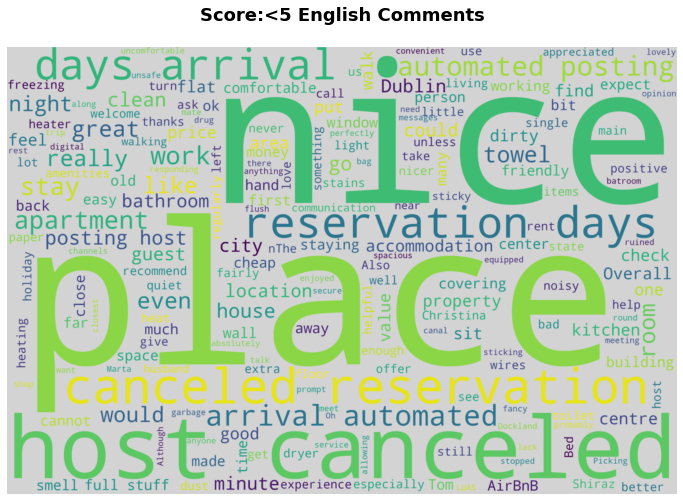

In [0]:
plot_wordcloud(word_cloud_dict['<5'], 'English','<5')

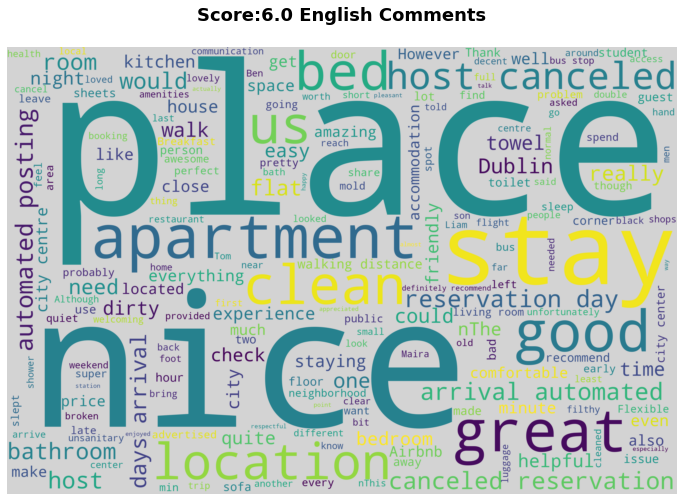

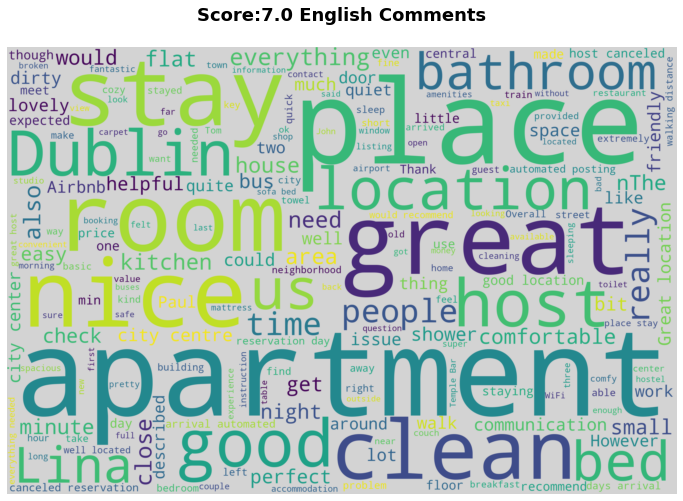

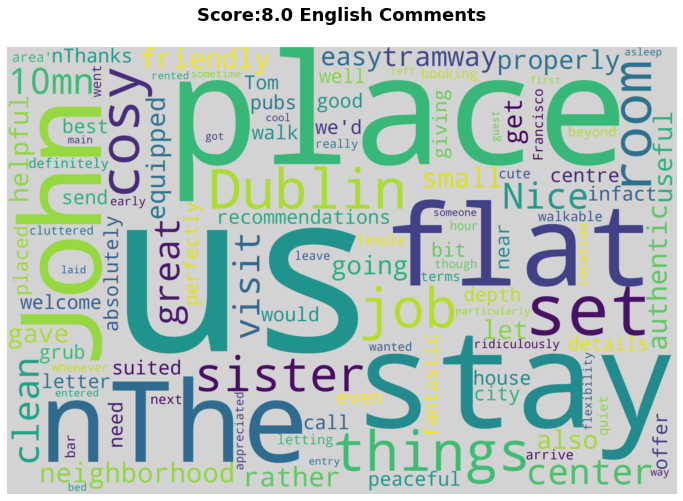

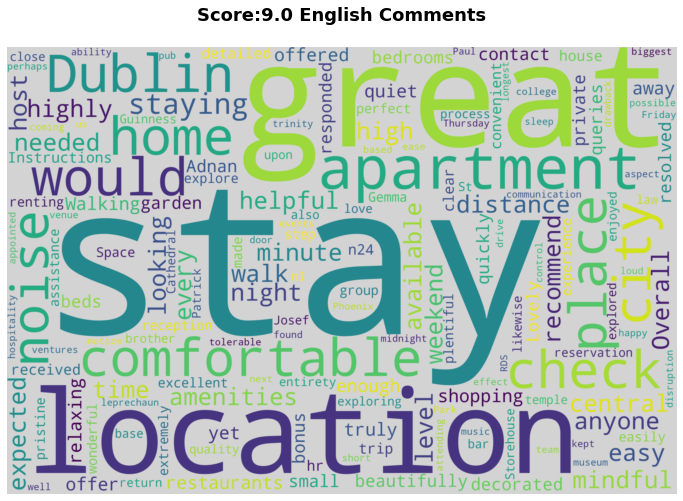

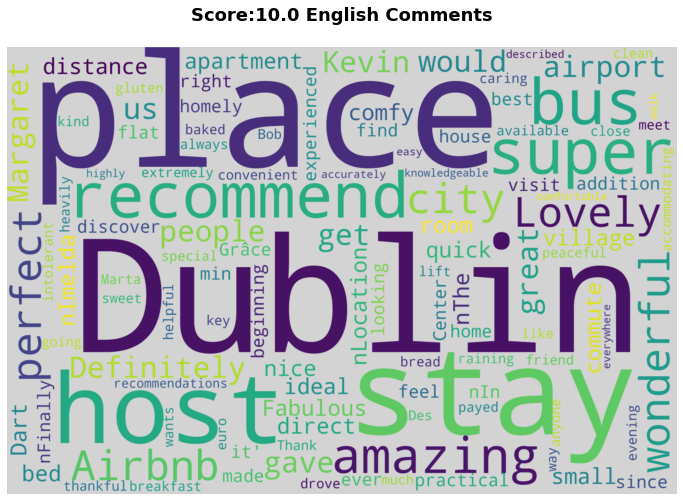

In [0]:
for i in score_list:
  plot_wordcloud(word_cloud_dict[i],'English',i)

# Sentiment Analysis
If we want use this, we need to study the theory behand it

In [0]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [0]:
print_sentiment_scores("Trump is a woman")

Trump is a woman------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [0]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [0]:
for i in score_list:
  df_select = df_scores[i]

In [0]:
df_select = df.sample(10000)
if(df_select.shape[0]>=5000):
    df_select = df_select.sample(5000)
df_select['language'] = df_select['comments'].apply(language_detection)
df_eng = df_select[df_select['language']=='en']
df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

In [0]:
df = df_eng

In [0]:
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
121046,11278756,458672654,2019-05-26,35867442,Shirley,"What a delightful stay! Susan was warm, intell...",NaN,35324357.0,53.33732,-6.26855,295.0,House,100.0,10.0,10.0,10.0,10.0,10.0,10.0,en,0.0,0.563,0.437,0.9767
220336,18429190,187518398,2017-08-27,43778300,Spencer,"Eleonora is a very welcoming host, immediately...",NaN,55746195.0,53.32550,-6.27707,123.0,Apartment,90.0,9.0,9.0,9.0,9.0,9.0,9.0,en,0.0,0.554,0.446,0.9771
137218,12889313,471420193,2019-06-17,41145251,Leonardo And Bernardine,Great location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.0,0.196,0.804,0.6249


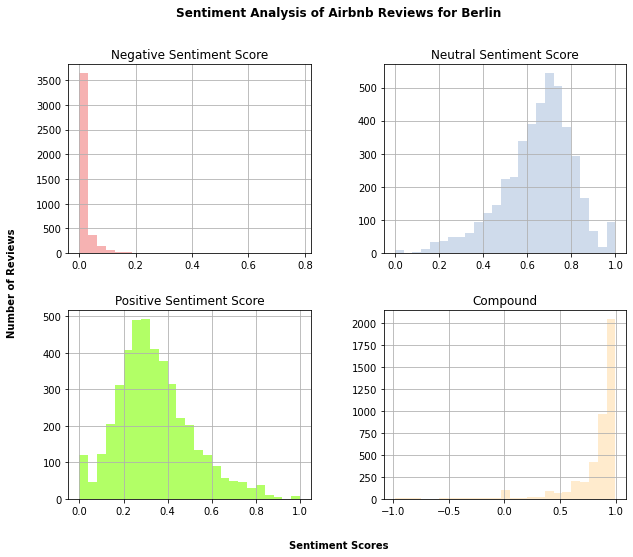

In [0]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Berlin\n\n', fontsize=12, fontweight='bold');

In [0]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [0]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [0]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


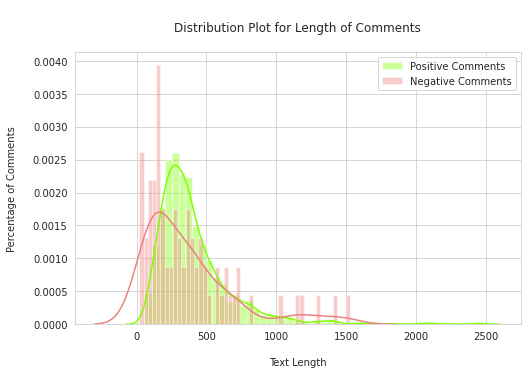

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

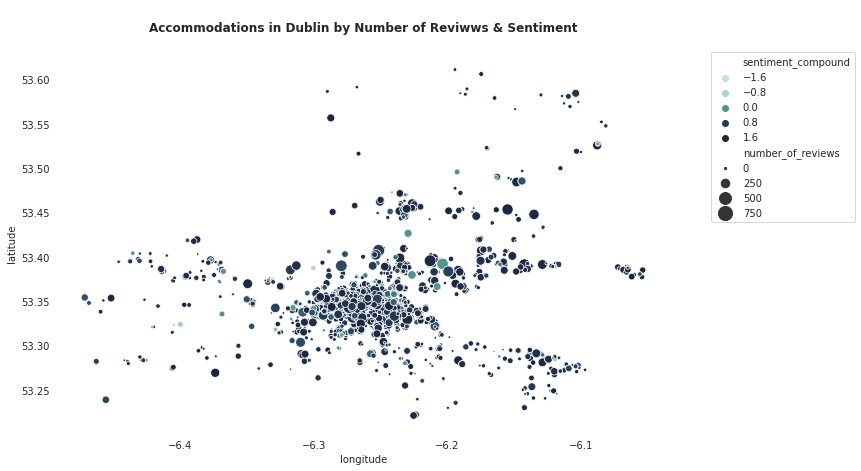

In [0]:
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

ax = sns.scatterplot(x="longitude", y="latitude", size='number_of_reviews', sizes=(5, 200),
                     hue='sentiment_compound', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Dublin by Number of Reviwws & Sentiment\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

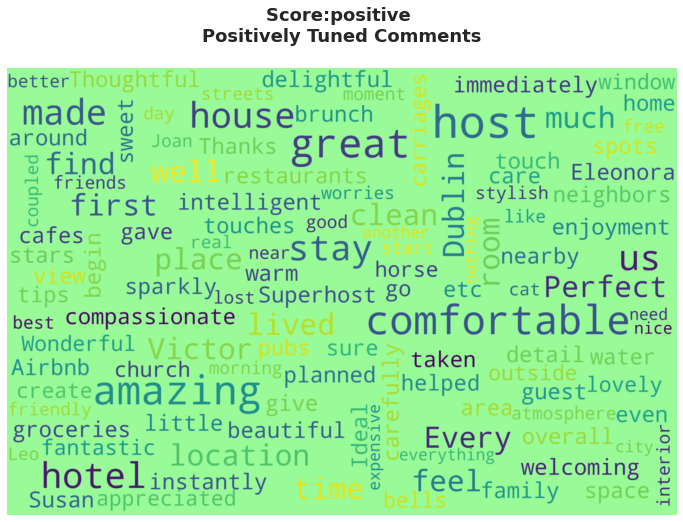

In [0]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned','positive')

# Frequency Distribution

In [0]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


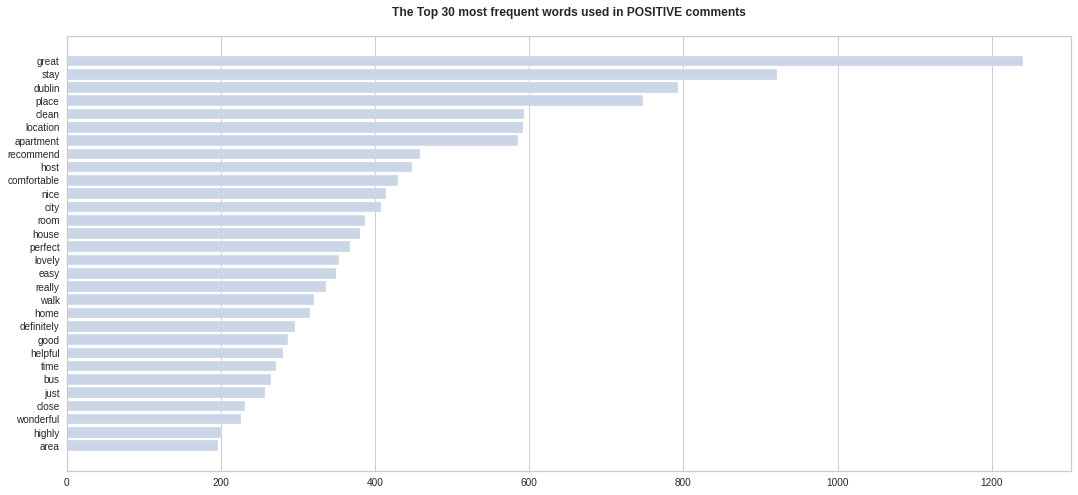

In [0]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# Topic Modelling

In [0]:
# importing libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
# prepare the preprocessing
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [0]:
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 
# uncomment the code if working locally
#pickle.dump(corpus, open('data/sentimentData/corpus.pkl', 'wb'))
#dictionary.save('data/sentimentData/dictionary.gensim')
import gensim

# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"great" + 0.015*"stay" + 0.013*"location" + 0.012*"dublin"')
(1, '0.024*"great" + 0.018*"stay" + 0.016*"place" + 0.015*"dublin"')
(2, '0.016*"great" + 0.014*"place" + 0.009*"room" + 0.009*"u"')


In [0]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.031*"great" + 0.023*"stay" + 0.020*"dublin" + 0.017*"place"')
(1, '0.011*"experience" + 0.009*"great" + 0.008*"lovely" + 0.007*"room"')
(2, '0.016*"place" + 0.014*"apartment" + 0.012*"everything" + 0.009*"would"')
(3, '0.012*"u" + 0.012*"great" + 0.011*"room" + 0.009*"apartment"')
(4, '0.023*"great" + 0.019*"location" + 0.018*"dublin" + 0.018*"stay"')
(5, '0.016*"stay" + 0.016*"great" + 0.012*"place" + 0.011*"u"')
(6, '0.021*"great" + 0.014*"stay" + 0.014*"place" + 0.009*"well"')
(7, '0.022*"great" + 0.012*"host" + 0.012*"place" + 0.010*"location"')
(8, '0.008*"night" + 0.007*"place" + 0.007*"day" + 0.006*"good"')
(9, '0.021*"place" + 0.017*"great" + 0.010*"host" + 0.010*"clean"')


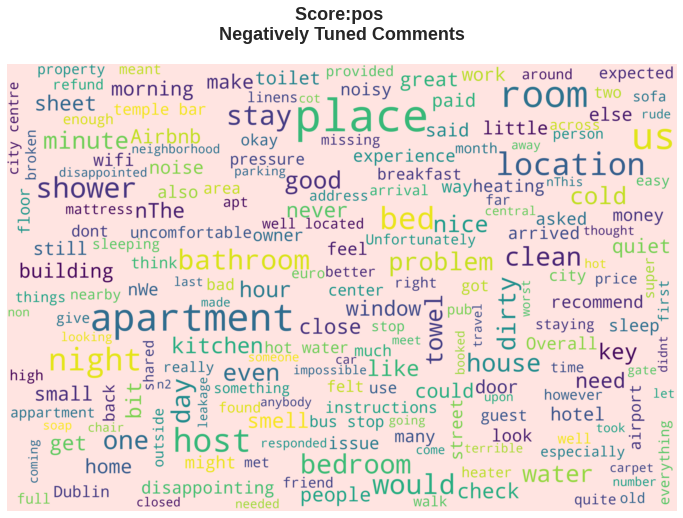

In [0]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="mistyrose",
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned','pos')